# **프로젝트: 자율주행 보조 시스템 만들기**
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

os.chdir('/content/drive/MyDrive/AIFFEL/GoingDeeper/GD06')

In [ ]:
os.getcwd()

'/content/drive/MyDrive/AIFFEL/GoingDeeper/GD06'

<br>

## **KITTI 데이터셋**


---

In [ ]:
import os, copy
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

DATA_PATH = os.getcwd() + '/object_detection/data'

print(DATA_PATH)

/content/drive/MyDrive/AIFFEL/GoingDeeper/GD06/object_detection/data


In [ ]:
(ds_train, ds_test), ds_info = tfds.load(
    'kitti',
    data_dir=DATA_PATH,
    split=['train', 'test'],
    shuffle_files=True,
    with_info=True,
)

In [ ]:
ds_info

tfds.core.DatasetInfo(
    name='kitti',
    version=3.2.0,
    description='Kitti contains a suite of vision tasks built using an autonomous driving
platform. The full benchmark contains many tasks such as stereo, optical flow,
visual odometry, etc. This dataset contains the object detection dataset,
including the monocular images and bounding boxes. The dataset contains 7481
training images annotated with 3D bounding boxes. A full description of the
annotations can be found in the readme of the object development kit readme on
the Kitti homepage.',
    homepage='http://www.cvlibs.net/datasets/kitti/',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/file_name': Text(shape=(), dtype=tf.string),
        'objects': Sequence({
            'alpha': tf.float32,
            'bbox': BBoxFeature(shape=(4,), dtype=tf.float32),
            'dimensions': Tensor(shape=(3,), dtype=tf.float32),
            'location': Tensor(shape=(3,), dtype

In [ ]:
data_save = {'ds_train':ds_train, 'ds_test':ds_test, 'ds_info':ds_info}


In [ ]:
data_save.keys()

dict_keys(['ds_train', 'ds_test', 'ds_info'])

In [ ]:
data_save['ds_info']

tfds.core.DatasetInfo(
    name='kitti',
    version=3.2.0,
    description='Kitti contains a suite of vision tasks built using an autonomous driving
platform. The full benchmark contains many tasks such as stereo, optical flow,
visual odometry, etc. This dataset contains the object detection dataset,
including the monocular images and bounding boxes. The dataset contains 7481
training images annotated with 3D bounding boxes. A full description of the
annotations can be found in the readme of the object development kit readme on
the Kitti homepage.',
    homepage='http://www.cvlibs.net/datasets/kitti/',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/file_name': Text(shape=(), dtype=tf.string),
        'objects': Sequence({
            'alpha': tf.float32,
            'bbox': BBoxFeature(shape=(4,), dtype=tf.float32),
            'dimensions': Tensor(shape=(3,), dtype=tf.float32),
            'location': Tensor(shape=(3,), dtype

In [ ]:
# import pickle

# with open('pickle_data', 'wb') as f:
#     pickle.dump(data_save, f)

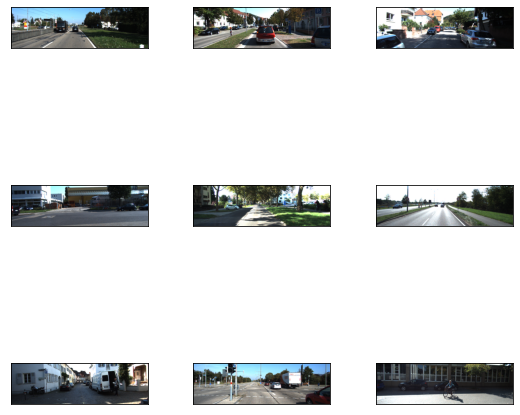

In [ ]:
_ = tfds.show_examples(ds_train, ds_info)

- 데이터셋은 6,347개의 학습데이터, 711개의 test data, 423개의 validation data로 구성됨.


- 라벨에는 alpha, bbox, dimension, location, occluded, rotation_y, truncated 등의 정보가 있다.

In [ ]:
ds_info

tfds.core.DatasetInfo(
    name='kitti',
    version=3.2.0,
    description='Kitti contains a suite of vision tasks built using an autonomous driving
platform. The full benchmark contains many tasks such as stereo, optical flow,
visual odometry, etc. This dataset contains the object detection dataset,
including the monocular images and bounding boxes. The dataset contains 7481
training images annotated with 3D bounding boxes. A full description of the
annotations can be found in the readme of the object development kit readme on
the Kitti homepage.',
    homepage='http://www.cvlibs.net/datasets/kitti/',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/file_name': Text(shape=(), dtype=tf.string),
        'objects': Sequence({
            'alpha': tf.float32,
            'bbox': BBoxFeature(shape=(4,), dtype=tf.float32),
            'dimensions': Tensor(shape=(3,), dtype=tf.float32),
            'location': Tensor(shape=(3,), dtype

![image](https://user-images.githubusercontent.com/103712369/178640283-b73fb187-ed40-4d05-b652-8beb358de253.png)

<br>

## **데이터 직접 확인하기**


---

------Example------
['image', 'image/file_name', 'objects']
------objects------
{'alpha': <tf.Tensor: shape=(3,), dtype=float32, numpy=array([-1.59, -1.27,  1.98], dtype=float32)>, 'bbox': <tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0.13370667, 0.4452818 , 0.54328   , 0.5736312 ],
       [0.45808   , 0.26686797, 0.53104   , 0.28133655],
       [0.38605332, 0.19425926, 0.5087467 , 0.27665058]], dtype=float32)>, 'dimensions': <tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1.66, 1.73, 3.05],
       [1.78, 0.6 , 1.81],
       [1.47, 1.72, 4.39]], dtype=float32)>, 'location': <tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[  0.2 ,   1.67,   9.42],
       [-17.93,   1.99,  47.94],
       [-11.3 ,   1.9 ,  25.94]], dtype=float32)>, 'occluded': <tf.Tensor: shape=(3,), dtype=int64, numpy=array([0, 0, 0])>, 'rotation_y': <tf.Tensor: shape=(3,), dtype=float32, numpy=array([-1.57, -1.63,  1.58], dtype=float32)>, 'truncated': <tf.Tensor: shape=(3,), dtype=float32, numpy

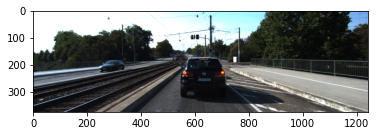

In [ ]:
sample = ds_train.take(1)

for example in sample:
    print('------Example------')
    print(list(example.keys()))
    image = example['image']
    filename = example['image/file_name'].numpy().decode('utf-8')
    objects = example['objects']

print('------objects------')
print(objects)

img = Image.fromarray(image.numpy())
plt.imshow(img)
plt.show()

In [ ]:
objects['bbox'].numpy()

array([[0.13370667, 0.4452818 , 0.54328   , 0.5736312 ],
       [0.45808   , 0.26686797, 0.53104   , 0.28133655],
       [0.38605332, 0.19425926, 0.5087467 , 0.27665058]], dtype=float32)

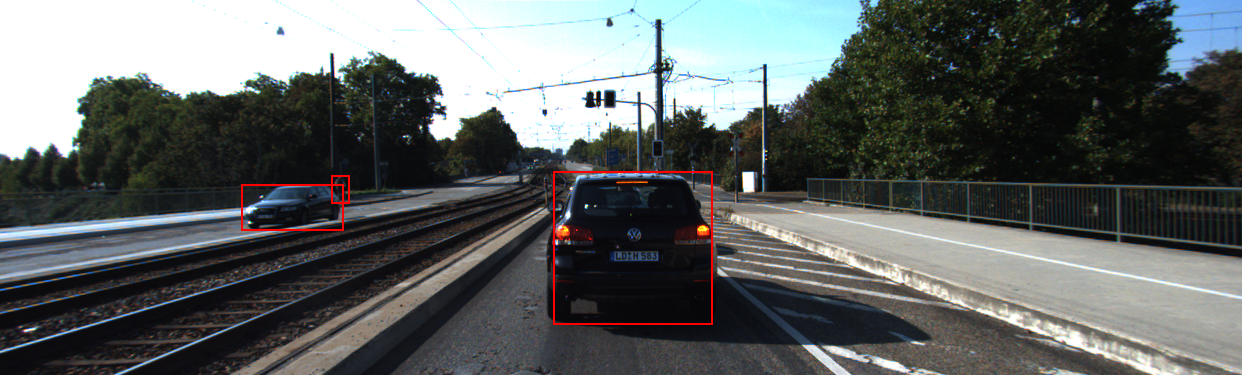

In [ ]:
# 이미지 위에 바운딩 박스를 그려 화면에 표시한다.
def visualize_bbox(input_image, object_bbox):
    input_image = copy.deepcopy(input_image)
    draw = ImageDraw.Draw(input_image)
    
    # 바운딩 박스 좌표(x_min, x_max, y_min, y_max) 구하기
    width, height = img.size
    x_min = object_bbox[:,1] * width
    x_max = object_bbox[:,3] * width
    y_min = height - object_bbox[:,0] * height
    y_max = height - object_bbox[:,2] * height
    
    # 바운딩 박스 그리기
    rects = np.stack([x_min, y_min, x_max, y_max], axis=1)
    for _rect in rects:
        draw.rectangle(_rect, outline=(255,0,0), width=2)

    return input_image

visualize_bbox(img, objects['bbox'].numpy())

<br>

## **RetinaNet**
---

- RetinaNet은 **Focal Loss for Dense Object Detection** 논문을 통해 공개된 Detection 모델


- 1-stage detector 모델인 YOLO와 SSD는 2-stage detector인 Faster-RCNN 등보다 속도는 빠르지만 성능이 낮은 문제를 가지고 있다. <br>이를 해결하기 위해 RetinaNet에서는 **focal loss**와 **FPN(Feature Pyramid Network)**를 적용한 네트워크를 사용한다.

### **Focal Loss**


> **물체를 배경보다 더 잘 학습하자 == 물체인 경우 Loss를 작게 만들자**

- Focal Loss는 기존의 1-stage detection 모델들이 물체 전경과 배경을 담고 있는 모든 그리드에 대해 한번에 학습됨으로 인해서 생기는 클래스 간의 불균형을 해결하고자 도입되었다. 


- 여기서 그리드와 픽셀이 혼란스러울 수 있는데<br>왼쪽위의 7x7 feature level에서는 한 픽셀이고, <br>오른쪽의 image level(자동차 사진)에서 보이는 그리드는 각 픽셀의 receptive field이다.


<br>

![image](https://user-images.githubusercontent.com/103712369/178637690-224a95eb-827d-482d-92c7-12bb6d541ee1.png)


### **Feature Pyramid Network**


> **여러 층의 특성 맵(feature map)을 다 사용해보자**

- FPN은 특성을 피라미드처럼 쌓아서 사용하는 방식<br>CNN 백본 네트워크에서 다양한 레이어의 결과값을 특성 맵(feature map)으로 사용할 수 있다. 


- 컨볼루션 연산은 커널을 통해 일정영역을 보고 몇 개의 숫자로 축약해내기 때문에, 입력 이미지를 기준으로 생각하면 ***입력 이미지와 먼 모델의 뒷쪽의 특성 맵***일수록 하나의 '셀(cell)'이 넓은 이미지 영역의 정보를 담고 있다. 


- 또한, ***입력이미지와 가까운 앞쪽 레이어의 특성 맵일수록*** 좁은 범위의 정보를 담고 있는데 이를 **receptive field**라고 부른다.

<br>

![image](https://user-images.githubusercontent.com/103712369/178638143-e4729d89-8049-47c4-a6fd-dd938de419f3.png)

<br>

## **데이터 준비**
---

### **데이터 파이프라인**

<br>

1. x와 y 좌표 위치 교체<br>
2. 무작위로 수평 뒤집기(Flip)<br>
3. 이미지 크기 조정 및 패딩 추가
4. 좌표계를 [x_min, y_min, x_max, y_max]에서 [x_min, y_min, width, height]으로 수정

<br>독립적인 함수를 각각 작성해보자


In [ ]:
def swap_xy(boxes):
    return tf.stack([boxes[:,1], boxes[:,0], boxes[:,3], boxes[:,2]], axis=-1)


In [ ]:
def random_flip_horizontal(image, boxes):
    if tf.random.uniform(()) > 0.5:
        image = tf.image.flip_left_right(image)
        boxes = tf.stack(
            [1 - boxes[:,2], boxes[:,1], 1 - boxes[:,0], boxes[:,3]], axis=-1,
        )
    return image, boxes

- 이미지 크기를 바꿀 때는 고려해야 할 점이 있는데, 1) 이미지의 비율은 그대로 유지되어야 하고, 2) 이미지의 최대/최소 크기도 제한해야 한다.

- 추가적으로 이미지의 크기를 바꾼 후에도 최종적으로 모델에 입력되는 이미지의 크기는 `stride`의 배수가 되도록 만든다.

In [ ]:
def resize_and_pad_image(image, training=True):

    min_side = 800.0
    max_side = 1333.0
    min_side_range = [640, 1024]
    stride = 128.0
    
    image_shape = tf.cast(tf.shape(image)[:2], dtype=tf.float32)
    if training:
        min_side = tf.random.uniform((), min_side_range[0], min_side_range[1], dtype=tf.float32)
    ratio = min_side / tf.reduce_min(image_shape)
    if ratio * tf.reduce_max(image_shape) > max_side:
        ratio = max_side / tf.reduce_max(image_shape)
    image_shape = ratio * image_shape
    image = tf.image.resize(image, tf.cast(image_shape, dtype=tf.int32))
    padded_image_shape = tf.cast(
        tf.math.ceil(image_shape / stride) * stride, dtype=tf.int32
    )
    image = tf.image.pad_to_bounding_box(
        image, 0, 0, padded_image_shape[0], padded_image_shape[1]
    )
    return image, image_shape, ratio

In [ ]:
def convert_to_xywh(boxes):
    return tf.concat(
        [(boxes[..., :2] + boxes[..., 2:]) / 2.0, boxes[..., 2:] - boxes[..., :2]],
        axis=-1,
    )

<br>

***위에서 정의한 함수들 연결***
<br>


In [ ]:
def preprocess_data(sample):
    image = sample["image"]
    bbox = swap_xy(sample["objects"]["bbox"])
    class_id = tf.cast(sample["objects"]["type"], dtype=tf.int32)

    image, bbox = random_flip_horizontal(image, bbox)
    image, image_shape, _ = resize_and_pad_image(image)

    bbox = tf.stack(
        [
            bbox[:, 0] * image_shape[1],
            bbox[:, 1] * image_shape[0],
            bbox[:, 2] * image_shape[1],
            bbox[:, 3] * image_shape[0],
        ],
        axis=-1,
    )
    bbox = convert_to_xywh(bbox)
    return image, bbox, class_id

<br>

### **인코딩**
---

In [ ]:
class AnchorBox:
    def __init__(self):
        self.aspect_ratios = [0.5, 1.0, 2.0]
        self.scales = [2 ** x for x in [0, 1 / 3, 2 / 3]]

        self._num_anchors = len(self.aspect_ratios) * len(self.scales)
        self._strides = [2 ** i for i in range(3, 8)]
        self._areas = [x ** 2 for x in [32.0, 64.0, 128.0, 256.0, 512.0]]
        self._anchor_dims = self._compute_dims()

    def _compute_dims(self):
        anchor_dims_all = []
        for area in self._areas:
            anchor_dims = []
            for ratio in self.aspect_ratios:
                anchor_height = tf.math.sqrt(area / ratio)
                anchor_width = area / anchor_height
                dims = tf.reshape(
                    tf.stack([anchor_width, anchor_height], axis=-1), [1, 1, 2]
                )
                for scale in self.scales:
                    anchor_dims.append(scale * dims)
            anchor_dims_all.append(tf.stack(anchor_dims, axis=-2))
        return anchor_dims_all

    def _get_anchors(self, feature_height, feature_width, level):
        rx = tf.range(feature_width, dtype=tf.float32) + 0.5
        ry = tf.range(feature_height, dtype=tf.float32) + 0.5
        centers = tf.stack(tf.meshgrid(rx, ry), axis=-1) * self._strides[level - 3]
        centers = tf.expand_dims(centers, axis=-2)
        centers = tf.tile(centers, [1, 1, self._num_anchors, 1])
        dims = tf.tile(
            self._anchor_dims[level - 3], [feature_height, feature_width, 1, 1]
        )
        anchors = tf.concat([centers, dims], axis=-1)
        return tf.reshape(
            anchors, [feature_height * feature_width * self._num_anchors, 4]
        )

    def get_anchors(self, image_height, image_width):
        anchors = [
            self._get_anchors(
                tf.math.ceil(image_height / 2 ** i),
                tf.math.ceil(image_width / 2 ** i),
                i,
            )
            for i in range(3, 8)
        ]
        return tf.concat(anchors, axis=0)

- 이제 Anchor Box를 생성했으니 입력할 데이터를 Anchor Box에 맞게 변형해줘야 합니다.


- 데이터 원본의 bbox는 주관식 정답이라고 생각하면 됩니다. 하지만 모델은 객관식으로 문제를 풀어야 하기 때문에 주관식 정답을 가장 가까운 객관식 정답으로 바꿔줘야 모델을 학습시킬 수 있습니다.


- 그럼 어떻게 주관식 정답을 객관식 정답으로 바꿀 수 있을까요? 여기에서 IoU를 사용합니다.


- IoU가 높은지 낮은지에 따라 Anchor Box가 정답인지 오답인지 체크해 두는 것이죠. 그러니 IoU를 계산할 수 있는 함수를 만듭니다.

In [ ]:
def convert_to_corners(boxes):
    return tf.concat(
        [boxes[..., :2] - boxes[..., 2:] / 2.0, boxes[..., :2] + boxes[..., 2:] / 2.0],
        axis=-1,
    )

def compute_iou(boxes1, boxes2):
    boxes1_corners = convert_to_corners(boxes1)
    boxes2_corners = convert_to_corners(boxes2)
    lu = tf.maximum(boxes1_corners[:, None, :2], boxes2_corners[:, :2])
    rd = tf.minimum(boxes1_corners[:, None, 2:], boxes2_corners[:, 2:])
    intersection = tf.maximum(0.0, rd - lu)
    intersection_area = intersection[:, :, 0] * intersection[:, :, 1]
    boxes1_area = boxes1[:, 2] * boxes1[:, 3]
    boxes2_area = boxes2[:, 2] * boxes2[:, 3]
    union_area = tf.maximum(
        boxes1_area[:, None] + boxes2_area - intersection_area, 1e-8
    )
    return tf.clip_by_value(intersection_area / union_area, 0.0, 1.0)

이제 실제 라벨을 Anchor Box에 맞춰주는 클래스를 만들어 봅시다. 위에서 작성한 compute_iou 함수를 이용해서 IoU를 구하고 그 IoU를 기준으로 물체에 해당하는 Anchor Box와 배경이 되는 Anchor Box를 지정해 줍니다. 그리고 그 Anchor Box와 실제 Bounding Box의 미세한 차이를 계산합니다. 상하좌우의 차이, 가로세로 크기의 차이를 기록해 두는데 가로세로 크기는 로그를 사용해서 기록해 둡니다.

이 과정은 마치 데이터를 훈련이 가능한 형식으로 encode하는 것 같으니 LabelEncoder라는 이름으로 클래스를 만들었습니다.

- IOU가 0.5보다 높으면 물체, 0.4보다 낮으면 배경이다.

In [ ]:
class LabelEncoder:

    def __init__(self):
        self._anchor_box = AnchorBox()
        self._box_variance = tf.convert_to_tensor(
            [0.1, 0.1, 0.2, 0.2], dtype=tf.float32
        )

    def _match_anchor_boxes(
        self, anchor_boxes, gt_boxes, match_iou=0.5, ignore_iou=0.4
    ):
        iou_matrix = compute_iou(anchor_boxes, gt_boxes)
        max_iou = tf.reduce_max(iou_matrix, axis=1)
        matched_gt_idx = tf.argmax(iou_matrix, axis=1)
        positive_mask = tf.greater_equal(max_iou, match_iou)
        negative_mask = tf.less(max_iou, ignore_iou)
        ignore_mask = tf.logical_not(tf.logical_or(positive_mask, negative_mask))
        return (
            matched_gt_idx,
            tf.cast(positive_mask, dtype=tf.float32),
            tf.cast(ignore_mask, dtype=tf.float32),
        )

    def _compute_box_target(self, anchor_boxes, matched_gt_boxes):
        box_target = tf.concat(
            [
                (matched_gt_boxes[:, :2] - anchor_boxes[:, :2]) / anchor_boxes[:, 2:],
                tf.math.log(matched_gt_boxes[:, 2:] / anchor_boxes[:, 2:]),
            ],
            axis=-1,
        )
        box_target = box_target / self._box_variance
        return box_target

    def _encode_sample(self, image_shape, gt_boxes, cls_ids):
        anchor_boxes = self._anchor_box.get_anchors(image_shape[1], image_shape[2])
        cls_ids = tf.cast(cls_ids, dtype=tf.float32)
        matched_gt_idx, positive_mask, ignore_mask = self._match_anchor_boxes(
            anchor_boxes, gt_boxes
        )
        matched_gt_boxes = tf.gather(gt_boxes, matched_gt_idx)
        box_target = self._compute_box_target(anchor_boxes, matched_gt_boxes)
        matched_gt_cls_ids = tf.gather(cls_ids, matched_gt_idx)
        cls_target = tf.where(
            tf.not_equal(positive_mask, 1.0), -1.0, matched_gt_cls_ids
        )
        cls_target = tf.where(tf.equal(ignore_mask, 1.0), -2.0, cls_target)
        cls_target = tf.expand_dims(cls_target, axis=-1)
        label = tf.concat([box_target, cls_target], axis=-1)
        return label

    def encode_batch(self, batch_images, gt_boxes, cls_ids):
        images_shape = tf.shape(batch_images)
        batch_size = images_shape[0]

        labels = tf.TensorArray(dtype=tf.float32, size=batch_size, dynamic_size=True)
        for i in range(batch_size):
            label = self._encode_sample(images_shape, gt_boxes[i], cls_ids[i])
            labels = labels.write(i, label)
        batch_images = tf.keras.applications.resnet.preprocess_input(batch_images)
        return batch_images, labels.stack()

<br>

## **모델 작성**
---

### **Feature Pyramid**


![image](https://user-images.githubusercontent.com/103712369/178644846-4830a57f-bac6-424d-aa5f-0bca855d40cd.png)

In [ ]:
class FeaturePyramid(tf.keras.layers.Layer):

    def __init__(self, backbone):
        super(FeaturePyramid, self).__init__(name="FeaturePyramid")
        self.backbone = backbone
        self.conv_c3_1x1 = tf.keras.layers.Conv2D(256, 1, 1, "same")
        self.conv_c4_1x1 = tf.keras.layers.Conv2D(256, 1, 1, "same")
        self.conv_c5_1x1 = tf.keras.layers.Conv2D(256, 1, 1, "same")
        self.conv_c3_3x3 = tf.keras.layers.Conv2D(256, 3, 1, "same")
        self.conv_c4_3x3 = tf.keras.layers.Conv2D(256, 3, 1, "same")
        self.conv_c5_3x3 = tf.keras.layers.Conv2D(256, 3, 1, "same")
        self.conv_c6_3x3 = tf.keras.layers.Conv2D(256, 3, 2, "same")
        self.conv_c7_3x3 = tf.keras.layers.Conv2D(256, 3, 2, "same")
        self.upsample_2x = tf.keras.layers.UpSampling2D(2)

    def call(self, images, training=False):
        c3_output, c4_output, c5_output = self.backbone(images, training=training)
        p3_output = self.conv_c3_1x1(c3_output)
        p4_output = self.conv_c4_1x1(c4_output)
        p5_output = self.conv_c5_1x1(c5_output)
        p4_output = p4_output + self.upsample_2x(p5_output)
        p3_output = p3_output + self.upsample_2x(p4_output)
        p3_output = self.conv_c3_3x3(p3_output)
        p4_output = self.conv_c4_3x3(p4_output)
        p5_output = self.conv_c5_3x3(p5_output)
        p6_output = self.conv_c6_3x3(c5_output)
        p7_output = self.conv_c7_3x3(tf.nn.relu(p6_output))
        return p3_output, p4_output, p5_output, p6_output, p7_output

- Object Detection의 라벨은 class와 box로 이루어지므로 각각을 추론하는 부분이 필요합니다. 그것을 head라고 부르기도 합니다. Backbone에 해당하는 네트워크와 FPN을 통해 pyramid layer가 추출되고 나면 그 feature들을 바탕으로 class를 예상하고, box도 예상합니다. class와 box가 모두 맞을 수도, class와 box 중 하나만 맞을 수도, 둘 다 틀릴 수도 있겠죠? class를 예측하는 head와 box를 예측하는 head가 별도로 존재한다는 것이 중요합니다.


- head부분은 유사한 형태로 만들 수 있으니 build_head라는 함수를 하나만 만들고 두 번 호출하면 될 것 같네요.

In [ ]:
def build_head(output_filters, bias_init):
    head = tf.keras.Sequential([tf.keras.Input(shape=[None, None, 256])])
    kernel_init = tf.initializers.RandomNormal(0.0, 0.01)
    for _ in range(4):
        head.add(
            tf.keras.layers.Conv2D(256, 3, padding="same", kernel_initializer=kernel_init)
        )
        head.add(tf.keras.layers.ReLU())
    head.add(
        tf.keras.layers.Conv2D(
            output_filters,
            3,
            1,
            padding="same",
            kernel_initializer=kernel_init,
            bias_initializer=bias_init,
        )
    )
    return head

우리가 만들 RetinaNet의 backbone은 ResNet50입니다. FPN에 이용할 수 있도록 중간 레이어도 output으로 연결해 줍니다.

In [ ]:
def get_backbone():
    backbone = tf.keras.applications.ResNet50(
        include_top=False, input_shape=[None, None, 3]
    )
    c3_output, c4_output, c5_output = [
        backbone.get_layer(layer_name).output
        for layer_name in ["conv3_block4_out", "conv4_block6_out", "conv5_block3_out"]
    ]
    return tf.keras.Model(
        inputs=[backbone.inputs], outputs=[c3_output, c4_output, c5_output]
    )

이제 RetinaNet을 완성해 봅시다. Backbone + FPN + classification용 head + box용 head 입니다.



In [ ]:
class RetinaNet(tf.keras.Model):

    def __init__(self, num_classes, backbone):
        super(RetinaNet, self).__init__(name="RetinaNet")
        self.fpn = FeaturePyramid(backbone)
        self.num_classes = num_classes

        prior_probability = tf.constant_initializer(-np.log((1 - 0.01) / 0.01))
        self.cls_head = build_head(9 * num_classes, prior_probability)
        self.box_head = build_head(9 * 4, "zeros")

    def call(self, image, training=False):
        features = self.fpn(image, training=training)
        N = tf.shape(image)[0]
        cls_outputs = []
        box_outputs = []
        for feature in features:
            box_outputs.append(tf.reshape(self.box_head(feature), [N, -1, 4]))
            cls_outputs.append(
                tf.reshape(self.cls_head(feature), [N, -1, self.num_classes])
            )
        cls_outputs = tf.concat(cls_outputs, axis=1)
        box_outputs = tf.concat(box_outputs, axis=1)
        return tf.concat([box_outputs, cls_outputs], axis=-1)

<br>

### **Loss**


***이제 모델을 준비했고, Loss에 대한 준비를 해봅시다.***


- RetinaNet에서는 Focal Loss를 사용하는데요. Box Regression에는 사용하지 않고 Classification Loss를 계산하는데만 사용됩니다. Box Regression에는 Smooth L1 Loss를 사용했네요.

<br>

![image](https://user-images.githubusercontent.com/103712369/178645435-f4253882-b7a1-49ef-b262-5aaef7adb7f9.png)




Smooth L1 Loss을 사용하는 Box Regression에는 delta를 기준으로 계산이 달라지고, Focal Loss를 사용하는 Classification에서는 alpha와 gamma를 사용해서 물체일 때와 배경일 때의 식이 달라지는 점에 주의하세요!

In [ ]:
class RetinaNetBoxLoss(tf.losses.Loss):

    def __init__(self, delta):
        super(RetinaNetBoxLoss, self).__init__(
            reduction="none", name="RetinaNetBoxLoss"
        )
        self._delta = delta

    def call(self, y_true, y_pred):
        difference = y_true - y_pred
        absolute_difference = tf.abs(difference)
        squared_difference = difference ** 2
        loss = tf.where(
            tf.less(absolute_difference, self._delta),
            0.5 * squared_difference,
            absolute_difference - 0.5,
        )
        return tf.reduce_sum(loss, axis=-1)


class RetinaNetClassificationLoss(tf.losses.Loss):

    def __init__(self, alpha, gamma):
        super(RetinaNetClassificationLoss, self).__init__(
            reduction="none", name="RetinaNetClassificationLoss"
        )
        self._alpha = alpha
        self._gamma = gamma

    def call(self, y_true, y_pred):
        cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(
            labels=y_true, logits=y_pred
        )
        probs = tf.nn.sigmoid(y_pred)
        alpha = tf.where(tf.equal(y_true, 1.0), self._alpha, (1.0 - self._alpha))
        pt = tf.where(tf.equal(y_true, 1.0), probs, 1 - probs)
        loss = alpha * tf.pow(1.0 - pt, self._gamma) * cross_entropy
        return tf.reduce_sum(loss, axis=-1)


class RetinaNetLoss(tf.losses.Loss):

    def __init__(self, num_classes=8, alpha=0.25, gamma=2.0, delta=1.0):
        super(RetinaNetLoss, self).__init__(reduction="auto", name="RetinaNetLoss")
        self._clf_loss = RetinaNetClassificationLoss(alpha, gamma)
        self._box_loss = RetinaNetBoxLoss(delta)
        self._num_classes = num_classes

    def call(self, y_true, y_pred):
        y_pred = tf.cast(y_pred, dtype=tf.float32)
        box_labels = y_true[:, :, :4]
        box_predictions = y_pred[:, :, :4]
        cls_labels = tf.one_hot(
            tf.cast(y_true[:, :, 4], dtype=tf.int32),
            depth=self._num_classes,
            dtype=tf.float32,
        )
        cls_predictions = y_pred[:, :, 4:]
        positive_mask = tf.cast(tf.greater(y_true[:, :, 4], -1.0), dtype=tf.float32)
        ignore_mask = tf.cast(tf.equal(y_true[:, :, 4], -2.0), dtype=tf.float32)
        clf_loss = self._clf_loss(cls_labels, cls_predictions)
        box_loss = self._box_loss(box_labels, box_predictions)
        clf_loss = tf.where(tf.equal(ignore_mask, 1.0), 0.0, clf_loss)
        box_loss = tf.where(tf.equal(positive_mask, 1.0), box_loss, 0.0)
        normalizer = tf.reduce_sum(positive_mask, axis=-1)
        clf_loss = tf.math.divide_no_nan(tf.reduce_sum(clf_loss, axis=-1), normalizer)
        box_loss = tf.math.divide_no_nan(tf.reduce_sum(box_loss, axis=-1), normalizer)
        loss = clf_loss + box_loss
        return loss

<br>

## **모델 학습**
---

앞에서 만들어 놓은 클래스와 함수를 이용해서 모델을 조립하고 학습시켜 봅시다.

In [ ]:
num_classes = 8
batch_size = 2

resnet50_backbone = get_backbone()
loss_fn = RetinaNetLoss(num_classes)
model = RetinaNet(num_classes, resnet50_backbone)

94781440/94765736 [==============================] - 1s 0us/step


다음으로 Learning Rate입니다. 논문에서는 8개의 GPU를 사용했기 때문에 우리 환경과는 맞지 않아요. 그래서 Learning Rate를 적절히 바꿔줍니다.

Optimizer는 동일하게 SGD를 사용합니다.

In [ ]:
learning_rates = [2.5e-06, 0.000625, 0.00125, 0.0025, 0.00025, 2.5e-05]
learning_rate_boundaries = [125, 250, 500, 240000, 360000]
learning_rate_fn = tf.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=learning_rate_boundaries, values=learning_rates
)
optimizer = tf.optimizers.SGD(learning_rate=learning_rate_fn, momentum=0.9)
model.compile(loss=loss_fn, optimizer=optimizer)

이제 데이터 전처리를 위한 파이프라인도 만들어 줍니다.

In [ ]:
label_encoder = LabelEncoder()
(train_dataset, val_dataset), dataset_info = tfds.load(
    "kitti", split=["train", "validation"], with_info=True, data_dir=DATA_PATH
)

autotune = tf.data.AUTOTUNE
train_dataset = train_dataset.map(preprocess_data, num_parallel_calls=autotune)
train_dataset = train_dataset.shuffle(8 * batch_size)
train_dataset = train_dataset.padded_batch(
    batch_size=batch_size, padding_values=(0.0, 1e-8, -1), drop_remainder=True
)
train_dataset = train_dataset.map(
    label_encoder.encode_batch, num_parallel_calls=autotune
)
train_dataset = train_dataset.prefetch(autotune)

val_dataset = val_dataset.map(preprocess_data, num_parallel_calls=autotune)
val_dataset = val_dataset.padded_batch(
    batch_size=1, padding_values=(0.0, 1e-8, -1), drop_remainder=True
)
val_dataset = val_dataset.map(label_encoder.encode_batch, num_parallel_calls=autotune)
val_dataset = val_dataset.prefetch(autotune)

이제 학습을 시켜봅시다.<br>

1 epoch당 학습 시간이 상당히 오래 걸리기 때문에 여기서는 학습 시키는 예시 코드만 보여드릴게요. (뒤에선 미리 학습된 모델을 불러와 사용할 예정입니다.😙)

In [ ]:
model_dir = os.getcwd() + '/object_detection/data/checkpoints/'
callbacks_list = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(model_dir, "weights" + "_epoch_{epoch}"),
        monitor="loss",
        save_best_only=False,
        save_weights_only=True,
        verbose=1,
    )
]

epochs = 10

model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs,
    callbacks=callbacks_list
)

Epoch 1/10
3173/3173 [==============================] - ETA: 0s - loss: 2.1872
Epoch 1: saving model to /content/drive/MyDrive/AIFFEL/GoingDeeper/GD06/object_detection/data/checkpoints/weights_epoch_1
3173/3173 [==============================] - 1658s 514ms/step - loss: 2.1872 - val_loss: 1.5011
Epoch 2/10
3173/3173 [==============================] - ETA: 0s - loss: 0.9861
Epoch 2: saving model to /content/drive/MyDrive/AIFFEL/GoingDeeper/GD06/object_detection/data/checkpoints/weights_epoch_2
3173/3173 [==============================] - 1629s 513ms/step - loss: 0.9861 - val_loss: 1.2077
Epoch 3/10
3173/3173 [==============================] - ETA: 0s - loss: 0.7265
Epoch 3: saving model to /content/drive/MyDrive/AIFFEL/GoingDeeper/GD06/object_detection/data/checkpoints/weights_epoch_3
3173/3173 [==============================] - 1630s 513ms/step - loss: 0.7265 - val_loss: 1.0804
Epoch 4/10
3173/3173 [==============================] - ETA: 0s - loss: 0.5773
Epoch 4: saving model to /cont

<br>

## **결과 확인하기**
---

In [ ]:
model_dir = os.getcwd() + '/object_detection/data/checkpoints/'
latest_checkpoint = tf.train.latest_checkpoint(model_dir)
model.load_weights(latest_checkpoint)

모델의 추론 결과를 처리할 함수를 레이어 형식으로 만들어 줍니다. 논문에서는 1000개의 후보를 골라 처리했지만 우리는 100개의 후보만 골라 처리하도록 합시다. 나머지 설정은 논문과 동일하게 해볼게요.

<br>

![image](https://user-images.githubusercontent.com/103712369/178646625-2ea42603-e156-4336-ae14-6cf0f321e474.png)

- NMS(Non-Max Suppression)은 직접 구현하지 않고 주어진 tf.image.combined_non_max_suppression를 사용했습니다.


- [tf.image.combined_non_max_suppression](https://www.tensorflow.org/api_docs/python/tf/image/combined_non_max_suppression)


- 위 참고자료를 꼭 읽어보세요. 입출력되는 값이 어떤지 알아야 코드가 이해가 됩니다. 특히 출력에 nmsed_boxes, nmsed_scores, nmsed_classes, valid_detections이 각각 무엇인지 알아야 활용할 수 있습니다.

In [ ]:
class DecodePredictions(tf.keras.layers.Layer):

    def __init__(
        self,
        num_classes=8,
        confidence_threshold=0.05,
        nms_iou_threshold=0.5,
        max_detections_per_class=100,
        max_detections=100,
        box_variance=[0.1, 0.1, 0.2, 0.2]
    ):
        super(DecodePredictions, self).__init__()
        self.num_classes = num_classes
        self.confidence_threshold = confidence_threshold
        self.nms_iou_threshold = nms_iou_threshold
        self.max_detections_per_class = max_detections_per_class
        self.max_detections = max_detections

        self._anchor_box = AnchorBox()
        self._box_variance = tf.convert_to_tensor(
            box_variance, dtype=tf.float32
        )

    def _decode_box_predictions(self, anchor_boxes, box_predictions):
        boxes = box_predictions * self._box_variance
        boxes = tf.concat(
            [
                boxes[:, :, :2] * anchor_boxes[:, :, 2:] + anchor_boxes[:, :, :2],
                tf.math.exp(boxes[:, :, 2:]) * anchor_boxes[:, :, 2:],
            ],
            axis=-1,
        )
        boxes_transformed = convert_to_corners(boxes)
        return boxes_transformed

    def call(self, images, predictions):
        image_shape = tf.cast(tf.shape(images), dtype=tf.float32)
        anchor_boxes = self._anchor_box.get_anchors(image_shape[1], image_shape[2])
        box_predictions = predictions[:, :, :4]
        cls_predictions = tf.nn.sigmoid(predictions[:, :, 4:])
        boxes = self._decode_box_predictions(anchor_boxes[None, ...], box_predictions)

        return tf.image.combined_non_max_suppression(
            tf.expand_dims(boxes, axis=2),
            cls_predictions,
            self.max_detections_per_class,
            self.max_detections,
            self.nms_iou_threshold,
            self.confidence_threshold,
            clip_boxes=False,
        )

이제 추론이 가능한 모델을 조립합니다.



In [ ]:
image = tf.keras.Input(shape=[None, None, 3], name="image")
predictions = model(image, training=False)
detections = DecodePredictions(confidence_threshold=0.5)(image, predictions)
inference_model = tf.keras.Model(inputs=image, outputs=detections)

모델의 추론 결과를 시각화 할 함수를 만들어 줍니다.



In [ ]:
def visualize_detections(
    image, boxes, classes, scores, figsize=(20, 20), linewidth=1, color=[0, 0, 1]
):
    image = np.array(image, dtype=np.uint8)
    plt.figure(figsize=figsize)
    plt.axis("off")
    plt.imshow(image)
    ax = plt.gca()
    for box, _cls, score in zip(boxes, classes, scores):
        text = "{}: {:.2f}".format(_cls, score)
        x1, y1, x2, y2 = box
        origin_x, origin_y = x1, image.shape[0] - y2 # matplitlib에서 Rectangle와 text를 그릴 때는 좌하단이 원점이고 위로 갈 수록 y값이 커집니다
        w, h = x2 - x1, y2 - y1
        patch = plt.Rectangle(
            [origin_x, origin_y], w, h, fill=False, edgecolor=color, linewidth=linewidth
        )
        ax.add_patch(patch)
        ax.text(
            origin_x,
            origin_y,
            text,
            bbox={"facecolor": color, "alpha": 0.4},
            clip_box=ax.clipbox,
            clip_on=True,
        )
    plt.show()
    return ax

이제 추론시에 입력 데이터를 전처리하기 위한 함수를 만들게요.

학습을 위한 전처리와 추론을 위한 전처리가 다르기 때문에 따로 작성됩니다. 추론을 위한 전처리가 훨씬 간단하네요.

In [ ]:
def prepare_image(image):
    image, _, ratio = resize_and_pad_image(image, training=False)
    image = tf.keras.applications.resnet.preprocess_input(image)
    return tf.expand_dims(image, axis=0), ratio

이제 모든 것이 준비 되었으니 학습된 결과를 확인합시다!!

In [ ]:
test_dataset = tfds.load("kitti", split="test", data_dir=DATA_PATH)
int2str = dataset_info.features["objects"]["type"].int2str

for sample in test_dataset.take(3):

    image = tf.cast(sample["image"], dtype=tf.float32)
    input_image, ratio = prepare_image(image)
    detections = inference_model.predict(input_image)
    num_detections = detections.valid_detections[0]
    class_names = [
        int2str(int(x)) for x in detections.nmsed_classes[0][:num_detections]
    ]
    print(class_names)
    visualize_detections(
        image,
        detections.nmsed_boxes[0][:num_detections] / ratio,
        class_names,
        detections.nmsed_scores[0][:num_detections],
    )

Output hidden; open in https://colab.research.google.com to view.

<br>

## **자율주행 시스템 만들기**
---

In [ ]:
!pip install keras-retinanet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 71 kB 5.9 MB/s 
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp37-cp37m-linux_x86_64.whl size=165369 sha256=10470cfa4e1c366a664168414caaa1576a08ce7c9b57d1206d62bbc11dcbd7d7
  Stored in directory: /root/.cache/pip/wheels/55/a1/41/f2dbc08b26549fe00041b9bc25c299f262b0311ad68cc52522
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=44affff8557ceda9dd19337375c356c1b7ab453393b8f07891ac3c9f25ea0f02
  Stored in directory: /root/.cache/pip/wheels/bd/ef/06/5d65f696360436c3a423020c4b7fd8c558c09ef264a0e6c575
Successfully built keras-retinanet keras-resnet


In [ ]:
# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.models import load_model
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

In [ ]:
def self_drive_assist(img_path, size_limit=300):
    image = read_image_bgr(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = tf.cast(image, dtype=tf.float32)
    input_image, ratio = prepare_image(image)
    detections = inference_model.predict(input_image)
    num_detections = detections.valid_detections[0]
    class_names = [
                    int2str(int(x)) for x in detections.nmsed_classes[0][:num_detections]
        ]

    visualize_detections(
        image,
        detections.nmsed_boxes[0][:num_detections] / ratio,
        class_names,
        detections.nmsed_scores[0][:num_detections],
    )
    count=0

    for i in class_names: 
        #print(count)
        if "Pedestrian" in class_names:
            return "Stop"

    box = detections.nmsed_boxes[0][:num_detections] / ratio
    
    for i in box:
        x1, y1, x2, y2 = i
        w, h = x2 - x1, y2 - y1
        if w.numpy() >= 300 or h.numpy() >= 300:
            return "Stop"    
    return "Go"

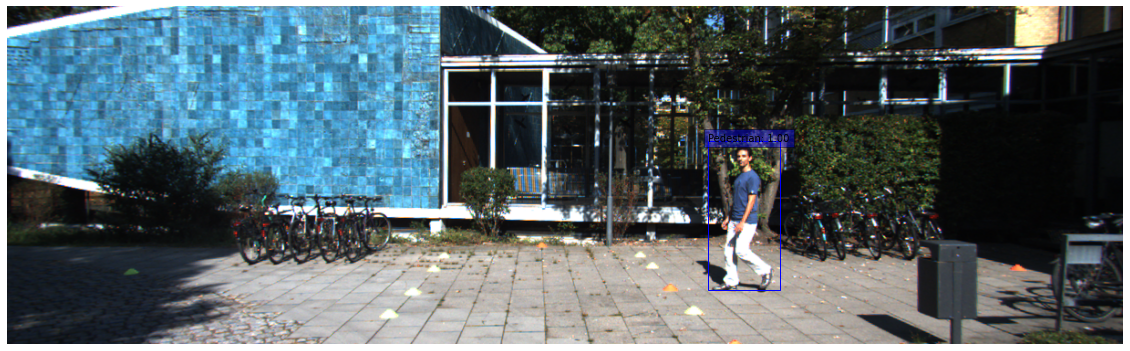

'Stop'

In [ ]:
img_path = os.getcwd()+'/object_detection/data/stop_1.png'
self_drive_assist(img_path=img_path)

In [ ]:
images = os.listdir(os.getcwd() + '/object_detection/data')
images = [file for file in images if file.endswith(".png")]
images

['go_1.png',
 'go_2.png',
 'go_3.png',
 'go_4.png',
 'go_5.png',
 'stop_1.png',
 'stop_2.png',
 'stop_3.png',
 'stop_4.png',
 'stop_5.png']

In [ ]:
image_path = []

for i in range(len(images)):
    image_path.append(os.getcwd()+'/object_detection/data/' + images[i])
    

In [ ]:
image_path

['/content/drive/MyDrive/AIFFEL/GoingDeeper/GD06/object_detection/data/go_1.png',
 '/content/drive/MyDrive/AIFFEL/GoingDeeper/GD06/object_detection/data/go_2.png',
 '/content/drive/MyDrive/AIFFEL/GoingDeeper/GD06/object_detection/data/go_3.png',
 '/content/drive/MyDrive/AIFFEL/GoingDeeper/GD06/object_detection/data/go_4.png',
 '/content/drive/MyDrive/AIFFEL/GoingDeeper/GD06/object_detection/data/go_5.png',
 '/content/drive/MyDrive/AIFFEL/GoingDeeper/GD06/object_detection/data/stop_1.png',
 '/content/drive/MyDrive/AIFFEL/GoingDeeper/GD06/object_detection/data/stop_2.png',
 '/content/drive/MyDrive/AIFFEL/GoingDeeper/GD06/object_detection/data/stop_3.png',
 '/content/drive/MyDrive/AIFFEL/GoingDeeper/GD06/object_detection/data/stop_4.png',
 '/content/drive/MyDrive/AIFFEL/GoingDeeper/GD06/object_detection/data/stop_5.png']

In [ ]:
# Stop 이미지 5장 그리고 Go 이미지 5장을 확인 해봅니다.
# 모두 올바른 결과를 반환하는 것을 확인할 수 있습니다. 

result = []
for i in image_path:
    result.append(self_drive_assist(i))
    # print(i)

print(result)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def test_system(func):
    work_dir = os.getcwd()+'/object_detection'
    score = 0
    test_set=[
        ("data/stop_1.png", "Stop"),
        ("data/stop_2.png", "Stop"),
        ("data/stop_3.png", "Stop"),
        ("data/stop_4.png", "Stop"),
        ("data/stop_5.png", "Stop"),
        ("data/go_1.png", "Go"),
        ("data/go_2.png", "Go"),
        ("data/go_3.png", "Go"),
        ("data/go_4.png", "Go"),
        ("data/go_5.png", "Go"),
    ]

    for image_file, answer in test_set:
        image_path = work_dir + '/' + image_file
        pred = self_drive_assist(model=model, img_path=image_path)
        print(image_file)
        print(f'prediction: {pred}, answer: {answer}\n')
        if pred == answer:
            score += 10
    print(f"결과: {score}점입니다.")

In [ ]:
import os

def test_system():
    work_dir = os.getcwd()+'/object_detection'
    score = 0
    test_set=[
        ("data/stop_1.png", "Stop"),
        ("data/stop_2.png", "Stop"),
        ("data/stop_3.png", "Stop"),
        ("data/stop_4.png", "Stop"),
        ("data/stop_5.png", "Stop"),
        ("data/go_1.png", "Go"),
        ("data/go_2.png", "Go"),
        ("data/go_3.png", "Go"),
        ("data/go_4.png", "Go"),
        ("data/go_5.png", "Go"),
    ]
    
    for image_file, answer in test_set:
        image_path = work_dir + '/' + image_file
        pred = self_drive_assist(image_path)
        if pred == answer:
            score += 10
    print(f"{score}점입니다.")



In [ ]:
test_system()

Output hidden; open in https://colab.research.google.com to view.

<br>

## **결론 및 회고**
---

- 본 프로젝트 : 자율주행 보조 시스템 만들기에서는 **`kitti`** 데이터셋 중 2D object 이미지를 사용하여 Object Detection을 수행하였다.


- 데이터 가공은 파이프라인을 구축하였다. bounding box의 x와 y의 위치를 교체하였으며, random 50:50 확률로 무작위로 좌우를 뒤집었다. 또한 이미지의 크기를 조정하고 패딩을 추가하였으며 bounding box의 좌표계를 수정하였다.



- 모델은 **`RetinaNet`**을 모델링하였다. Feature Pyramid 모델을 논문에서의 내용을 약간 수정하여 모델링 하였으며, backbone 네트워크로 **`ResNet-50`**을 가져와서 사용하였다. Object Detection의 라벨은 class와 box로 이루어지므로 각각을 추론하는 부분이 필요한데 이를 위해 head 네트워크를 설계하였다. 



- **RetinaNet`**에서는 객체 분류를 위해 Focal Loss를 사용한다. Box Regression에서는 Smooth L1 Loss를 사용한다.

---

- 이미지의 object를 detecting하고 classification 및 box regression을 통해 우리의 자율주행차가 멈춰야하는 상황인지 가도 되는 상황인지를 파악하는 프로젝트를 진행해보았다.